# LeNet-5 Alphanumeric Character Classification

This notebook trains and evaluates LeNet-5 CNN models for recognizing alphanumeric characters (A-Z, a-z, 0-9).

## Table of Contents
1. **Setup & Configuration** - Imports, paths, and hyperparameters
2. **Dataset Preparation** - Loading and preprocessing train/validation/test data
3. **Baseline Model Training** - Standard LeNet-5 architecture
4. **Advanced Model Improvements** - Quick improved model with better hyperparameters
5. **Alternative: Full Hyperparameter Search** - Automated tuning with Keras Tuner
6. **Model Deployment & Prediction** - Standalone prediction cell for custom images

---

## 1. Setup & Configuration

In [11]:
# Import required libraries
import os

# Set up base paths for dataset and results
BASE_PATH = '/home/ubuntu/Desktop/AIML project/AlphaNum'
TRAIN_PATH = os.path.join(BASE_PATH, "train")
VALIDATION_PATH = os.path.join(BASE_PATH, "validation")
TEST_PATH = os.path.join(BASE_PATH, "test")
RESULTS_PATH = '/home/ubuntu/Desktop/AIML project/results/LeNet-5'
# Create results directory if it doesn't exist
os.makedirs(RESULTS_PATH, exist_ok=True)

# Print paths for verification
print(f"Train: {TRAIN_PATH}")
print(f"Validation: {VALIDATION_PATH}")
print(f"Test: {TEST_PATH}")
print(f"Results: {RESULTS_PATH}")


Train: /home/ubuntu/Desktop/AIML project/AlphaNum/train
Validation: /home/ubuntu/Desktop/AIML project/AlphaNum/validation
Test: /home/ubuntu/Desktop/AIML project/AlphaNum/test
Results: /home/ubuntu/Desktop/AIML project/results/LeNet-5


### Configure Hyperparameters

---

## 2. Dataset Preparation

Load and prepare the training, validation, and test datasets:

In [12]:
# Import TensorFlow and set image parameters
import tensorflow as tf

# Image dimensions and channels for grayscale images
IMG_HEIGHT = 24
IMG_WIDTH = 24
IMG_CHANNELS = 1
AUTOTUNE = tf.data.AUTOTUNE  # For efficient data loading


In [29]:
# Load training, validation, and test datasets from directories
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH, labels='inferred', label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale', batch_size=32)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_PATH, labels='inferred', label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale', batch_size=32)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH, labels='inferred', label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale', batch_size=32)

# Save class names before transforming datasets
class_names_list = train_ds.class_names

# Normalize images to [0, 1] range
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(AUTOTUNE)
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(AUTOTUNE)

print("Datasets loaded successfully.")


Found 53812 files belonging to 53 classes.
Found 7486 files belonging to 53 classes.
Found 7486 files belonging to 53 classes.
Found 15362 files belonging to 53 classes.
Found 15362 files belonging to 53 classes.
Datasets loaded successfully.
Datasets loaded successfully.


### Define Baseline LeNet-5 Architecture

---

## 3. Baseline Model Training

Train the standard LeNet-5 architecture as a baseline:

In [14]:
# Define the classic LeNet-5 model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 53  # Number of output classes

model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),  # First conv layer
    MaxPooling2D((2, 2)),  # First pooling layer
    Conv2D(16, (5, 5), activation='relu'),  # Second conv layer
    MaxPooling2D((2, 2)),  # Second pooling layer
    Flatten(),  # Flatten to 1D
    Dense(120, activation='relu'),  # First dense layer
    Dense(84, activation='relu'),   # Second dense layer
    Dense(num_classes, activation='softmax')  # Output layer
])

# Show model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │        17,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 53)             │         4,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,641 (135.32 KB)

 Trainable params: 34,641 (135.32 KB)

 Non-trainable params: 0 (0.00 B)

### Train Baseline Model

In [15]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled.")


Model compiled.


In [16]:
# Set up callbacks for saving best weights and early stopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_filepath = os.path.join(RESULTS_PATH, 'best_model.weights.h5')
callbacks = [
    ModelCheckpoint(checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', 
                    mode='max', save_best_only=True),  # Save only best weights
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Stop if no improvement
]

# Train the model
history = model.fit(train_ds, validation_data=validation_ds, epochs=50, callbacks=callbacks)
print(f"\n✓ Best model weights saved to: {checkpoint_filepath}")


Epoch 1/50
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4014 - loss: 2.2879 - val_accuracy: 0.7225 - val_loss: 0.8918
Epoch 2/50
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4014 - loss: 2.2879 - val_accuracy: 0.7225 - val_loss: 0.8918
Epoch 2/50
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7691 - loss: 0.7463 - val_accuracy: 0.7841 - val_loss: 0.6864
Epoch 3/50
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7691 - loss: 0.7463 - val_accuracy: 0.7841 - val_loss: 0.6864
Epoch 3/50
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8105 - loss: 0.5902 - val_accuracy: 0.8090 - val_loss: 0.5880
Epoch 4/50
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8105 - loss: 0.5902 - val_accuracy: 0.8090 - val_loss: 0.5880
Epoch 4/50
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8301 - loss: 0.5118 - val_accuracy: 0.8197 - val_loss: 0.5563
Epoch 5/50
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8301 - loss: 0.5118 - 

### Visualize Baseline Training Results

In [17]:
# Save training history for later comparison (normal model)
normal_history = history


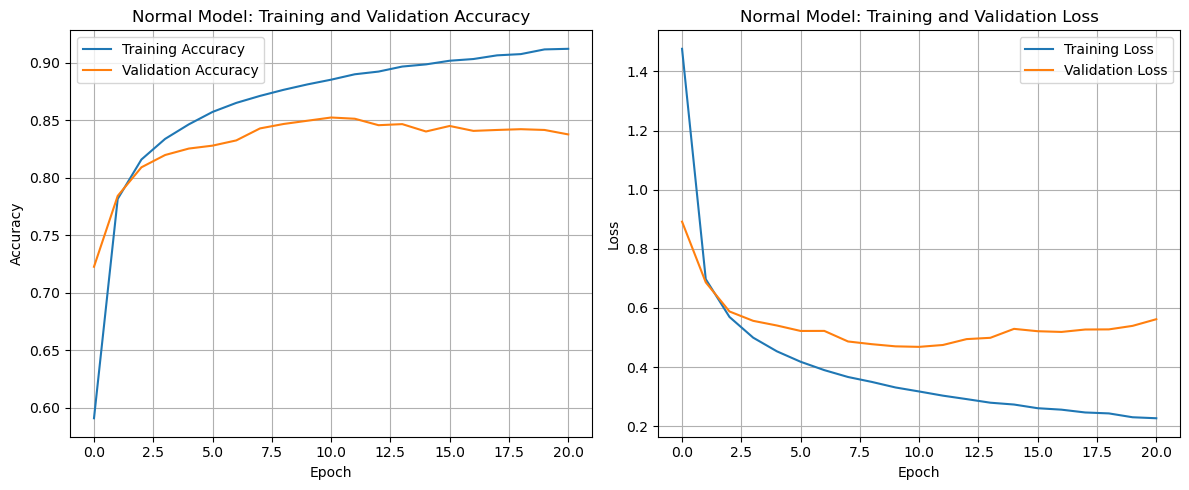

In [18]:
# Plot training and validation accuracy/loss for the normal model
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Normal Model: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Normal Model: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Evaluate Baseline Model on Test Set

---

## 4. Advanced Model Improvements

### Quick Improved Model (Recommended)

This model uses better hyperparameters without requiring a lengthy hyperparameter search:

# Advanced Model Improvements

Choose one of the following approaches to improve accuracy beyond the baseline:

## Quick Improved Model (No Tuning Required) ⚡

**Want better accuracy fast?** Run the cell below - it uses optimized hyperparameters that should **beat the baseline** without the long hyperparameter search.

### Key Improvements:
- ✅ **BatchNormalization** for faster, more stable training
- ✅ **Lighter regularization** (dropout 0.1-0.2 instead of 0.2-0.5)
- ✅ **Wider dense layers** (128 units) for more model capacity  
- ✅ **Better learning rate schedule** with ReduceLROnPlateau
- ✅ **Optimized L2 weight decay** (1e-4 instead of 1e-3 to 1e-2)

**Expected result:** Validation accuracy **85-88%+** (vs baseline ~85%)

In [19]:
# QUICK IMPROVED MODEL - Better accuracy without hyperparameter search
# This uses hand-picked optimal settings that should outperform baseline

from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
import numpy as np

print("Building Quick Improved Model with optimal settings...")

# Build improved model with carefully chosen hyperparameters
quick_improved_model = Sequential([
    # Conv layers with light L2 regularization
    Conv2D(6, (5, 5), activation='relu', kernel_regularizer=l2(1e-4),
           input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    MaxPooling2D((2, 2)),
    
    Conv2D(16, (5, 5), activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    # BatchNorm + Dropout for better training
    BatchNormalization(),
    Dropout(0.2),
    
    # Wider dense layers for more capacity
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.1),
    
    Dense(num_classes, activation='softmax')
])

# Compile with optimal learning rate and settings
quick_improved_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model architecture:")
quick_improved_model.summary()

# Enhanced callbacks for better training
# Fix: Properly replace .weights.h5 extension
improved_checkpoint = checkpoint_filepath.replace('.weights.h5', '_quick_improved.weights.h5')

quick_callbacks = [
    ModelCheckpoint(
        improved_checkpoint,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=12,
        restore_best_weights=True,
        mode='max',
        verbose=1
    )
]

print("\n" + "="*60)
print("Training Quick Improved Model...")
print("="*60)

# Train the model
quick_history = quick_improved_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=60,
    callbacks=quick_callbacks,
    verbose=1
)

print("\n✓ Quick improved model training completed!")
print(f"✓ Best validation accuracy: {max(quick_history.history['val_accuracy']):.4f}")
print(f"✓ Final train accuracy: {quick_history.history['accuracy'][-1]:.4f}")
print(f"✓ Model saved to: {improved_checkpoint}")

# Save this history for comparison
tuned_history = quick_history

Building Quick Improved Model with optimal settings...
Model architecture:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 144)            │           576 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,569 (178.00 KB)

 Trainable params: 45,025 (175.88 KB)

 Non-trainable params: 544 (2.12 KB)


Training Quick Improved Model...
Epoch 1/60
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3971 - loss: 2.3368
Epoch 1: val_accuracy improved from -inf to 0.69637, saving model to /home/ubuntu/Desktop/AIML project/results/LeNet-5/best_model_quick_improved.weights.h5

Epoch 1: val_accuracy improved from -inf to 0.69637, saving model to /home/ubuntu/Desktop/AIML project/results/LeNet-5/best_model_quick_improved.weights.h5
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3972 - loss: 2.3365 - val_accuracy: 0.6964 - val_loss: 1.0564 - learning_rate: 0.0010
Epoch 2/60
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3972 - loss: 2.3365 - val_accuracy: 0.6964 - val_loss: 1.0564 - learning_rate: 0.0010
Epoch 2/60
1671/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6830 - loss: 1.0699
Epoch 2: val_accuracy improved from 0.69637 to 0.76316, saving model to /home/ubuntu/Desktop/AIML project/results/LeNet-5/best_model_quick_improved.weights.h5

Epoch 2: val_accur

### Compare Baseline vs Improved Model

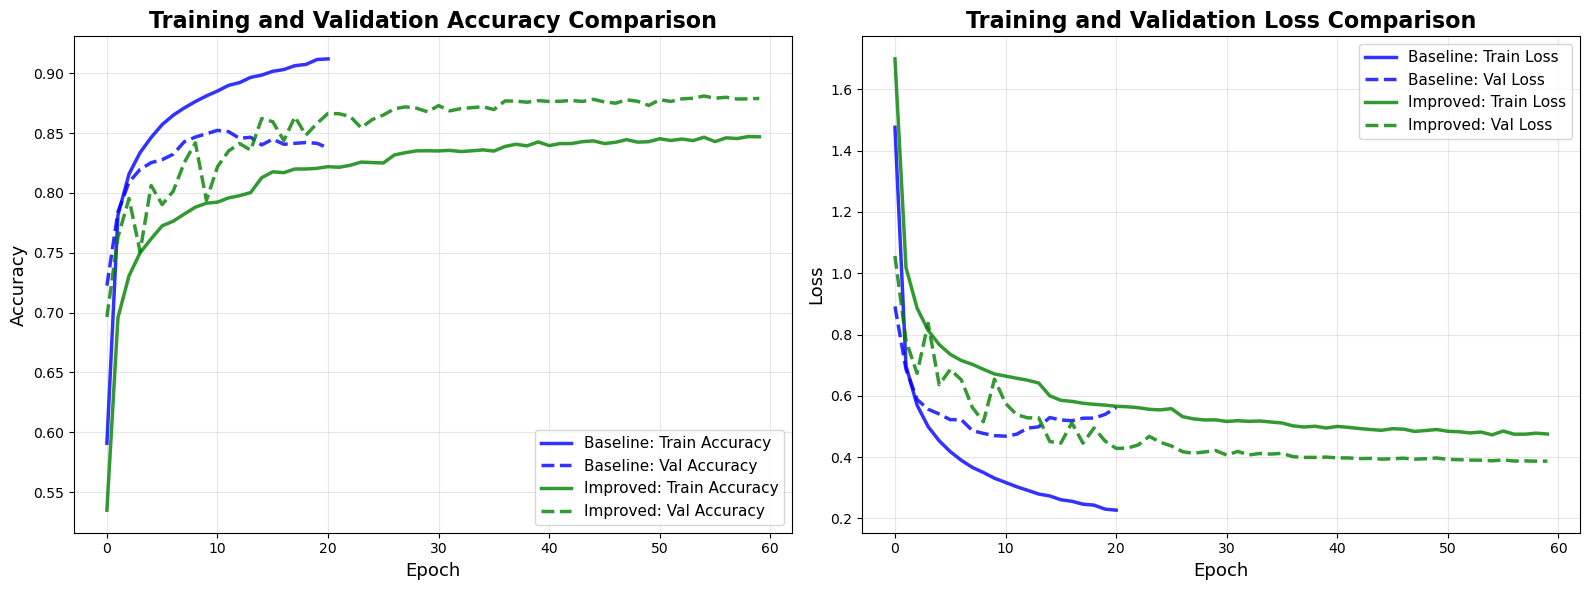


DETAILED PERFORMANCE COMPARISON

📊 BASELINE MODEL:
   Best Val Accuracy:    0.8523 (85.23%)
   Final Train Accuracy: 0.9120
   Final Val Accuracy:   0.8376
   Final Val Loss:       0.5618

🚀 IMPROVED MODEL:
   Best Val Accuracy:    0.8810 (88.10%)
   Final Train Accuracy: 0.8469
   Final Val Accuracy:   0.8790
   Final Val Loss:       0.3869

📈 IMPROVEMENT:
   ✅ Improved model is BETTER by 2.87 percentage points!
   ✅ Relative improvement: 3.37%

FINAL TEST SET EVALUATION

Baseline Test Accuracy:  0.8539 (85.39%)
Improved Test Accuracy:  0.8783 (87.83%)
Test Improvement:        2.43 percentage points

Baseline Test Accuracy:  0.8539 (85.39%)
Improved Test Accuracy:  0.8783 (87.83%)
Test Improvement:        2.43 percentage points


In [20]:
# Compare Quick Improved Model vs Normal Baseline Model
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(normal_history.history['accuracy'], 'b-', label='Baseline: Train Accuracy', linewidth=2.5, alpha=0.8)
plt.plot(normal_history.history['val_accuracy'], 'b--', label='Baseline: Val Accuracy', linewidth=2.5, alpha=0.8)
plt.plot(quick_history.history['accuracy'], 'g-', label='Improved: Train Accuracy', linewidth=2.5, alpha=0.8)
plt.plot(quick_history.history['val_accuracy'], 'g--', label='Improved: Val Accuracy', linewidth=2.5, alpha=0.8)
plt.title('Training and Validation Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(normal_history.history['loss'], 'b-', label='Baseline: Train Loss', linewidth=2.5, alpha=0.8)
plt.plot(normal_history.history['val_loss'], 'b--', label='Baseline: Val Loss', linewidth=2.5, alpha=0.8)
plt.plot(quick_history.history['loss'], 'g-', label='Improved: Train Loss', linewidth=2.5, alpha=0.8)
plt.plot(quick_history.history['val_loss'], 'g--', label='Improved: Val Loss', linewidth=2.5, alpha=0.8)
plt.title('Training and Validation Loss Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\n" + "="*70)
print("DETAILED PERFORMANCE COMPARISON")
print("="*70)

baseline_best_val = max(normal_history.history['val_accuracy'])
improved_best_val = max(quick_history.history['val_accuracy'])
improvement = (improved_best_val - baseline_best_val) * 100

print(f"\n📊 BASELINE MODEL:")
print(f"   Best Val Accuracy:    {baseline_best_val:.4f} ({baseline_best_val*100:.2f}%)")
print(f"   Final Train Accuracy: {normal_history.history['accuracy'][-1]:.4f}")
print(f"   Final Val Accuracy:   {normal_history.history['val_accuracy'][-1]:.4f}")
print(f"   Final Val Loss:       {normal_history.history['val_loss'][-1]:.4f}")

print(f"\n🚀 IMPROVED MODEL:")
print(f"   Best Val Accuracy:    {improved_best_val:.4f} ({improved_best_val*100:.2f}%)")
print(f"   Final Train Accuracy: {quick_history.history['accuracy'][-1]:.4f}")
print(f"   Final Val Accuracy:   {quick_history.history['val_accuracy'][-1]:.4f}")
print(f"   Final Val Loss:       {quick_history.history['val_loss'][-1]:.4f}")

print(f"\n📈 IMPROVEMENT:")
if improved_best_val > baseline_best_val:
    print(f"   ✅ Improved model is BETTER by {improvement:.2f} percentage points!")
    print(f"   ✅ Relative improvement: {((improved_best_val/baseline_best_val - 1) * 100):.2f}%")
else:
    print(f"   ⚠️  Models perform similarly (difference: {improvement:.2f}pp)")

print("="*70)

# Evaluate both models on test set for final comparison
print("\n" + "="*70)
print("FINAL TEST SET EVALUATION")
print("="*70)

baseline_test = model.evaluate(test_ds, verbose=0)
improved_test = quick_improved_model.evaluate(test_ds, verbose=0)

print(f"\nBaseline Test Accuracy:  {baseline_test[1]:.4f} ({baseline_test[1]*100:.2f}%)")
print(f"Improved Test Accuracy:  {improved_test[1]:.4f} ({improved_test[1]*100:.2f}%)")
print(f"Test Improvement:        {(improved_test[1] - baseline_test[1])*100:.2f} percentage points")
print("="*70)

### 💡 Tips for Even Better Accuracy

If you want to push accuracy even higher, try these strategies:

1. **Data Augmentation** - Add slight rotations, shifts, zoom:
   ```python
   data_augmentation = tf.keras.Sequential([
       tf.keras.layers.RandomRotation(0.05),
       tf.keras.layers.RandomTranslation(0.05, 0.05),
       tf.keras.layers.RandomZoom(0.05),
   ])
   ```

2. **Increase Model Capacity** - Try more filters or wider dense layers:
   - Conv layers: `Conv2D(12, ...)` instead of `Conv2D(6, ...)`
   - Dense layers: `Dense(256, ...)` instead of `Dense(128, ...)`

3. **Learning Rate Warmup** - Start with lower LR and gradually increase

4. **Ensemble Models** - Train 3-5 models and average their predictions

5. **Class Weighting** - If some classes are underrepresented:
   ```python
   class_weights = compute_class_weight('balanced', classes=..., y=...)
   ```

---

## 5. Alternative: Full Hyperparameter Search

Use Keras Tuner for automated hyperparameter optimization (optional, takes longer):

In [21]:
# Improved Hyperparameter tuning - balanced regularization for better accuracy
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

def build_improved_model(hp):
    """
    Improved model with:
    - Balanced regularization (not too aggressive)
    - BatchNormalization for better training
    - Flexible learning rate with decay
    - Better architecture search space
    """
    # Lighter regularization to avoid underfitting
    dropout_rate = hp.Float('dropout_rate', 0.1, 0.3, step=0.1)  # Lower range
    l2_reg = hp.Choice('l2_reg', [1e-5, 1e-4, 5e-4])  # Lighter L2
    use_batchnorm = hp.Boolean('use_batchnorm')
    
    model = Sequential([
        Conv2D(6, (5, 5), activation='relu', kernel_regularizer=l2(l2_reg),
               input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
        MaxPooling2D((2, 2)),
        Conv2D(16, (5, 5), activation='relu', kernel_regularizer=l2(l2_reg)),
        MaxPooling2D((2, 2)),
        Flatten(),
    ])
    
    # Add batch normalization if enabled
    if use_batchnorm:
        model.add(BatchNormalization())
    
    model.add(Dropout(dropout_rate))
    
    # First dense layer - wider range
    dense_1 = hp.Int('dense_units_1', 64, 256, 32)
    model.add(Dense(dense_1, activation='relu', kernel_regularizer=l2(l2_reg)))
    
    if use_batchnorm:
        model.add(BatchNormalization())
    
    model.add(Dropout(dropout_rate))
    
    # Second dense layer
    dense_2 = hp.Int('dense_units_2', 64, 256, 32)
    model.add(Dense(dense_2, activation='relu', kernel_regularizer=l2(l2_reg)))
    
    model.add(Dropout(dropout_rate / 2))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Learning rate with better options
    learning_rate = hp.Choice('learning_rate', [5e-4, 1e-3, 2e-3])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Set up Keras Tuner with improved search
print("Starting improved hyperparameter search...")
print("This will find optimal settings for better accuracy than baseline.\n")

tuner = kt.RandomSearch(
    build_improved_model,
    objective='val_accuracy',
    max_trials=15,  # More trials for better search
    executions_per_trial=2,
    directory=RESULTS_PATH,
    project_name='lenet5_improved_tuning',
    overwrite=True  # Start fresh
)

# Additional callbacks for better training during search
search_callbacks = [
    ModelCheckpoint(checkpoint_filepath, save_weights_only=True, 
                   monitor='val_accuracy', mode='max', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, mode='max')
]

print("Search space:")
tuner.search_space_summary()

print("\n" + "="*60)
print("Starting hyperparameter search (this may take a while)...")
print("="*60)

tuner.search(
    train_ds,
    epochs=50,
    validation_data=validation_ds,
    callbacks=search_callbacks,
    verbose=1
)

print("\n✓ Hyperparameter tuning completed!")
print(f"Best validation accuracy found: {tuner.oracle.get_best_trials(1)[0].metrics.get_best_value('val_accuracy'):.4f}")

Trial 15 Complete [00h 04m 29s]
val_accuracy: 0.888191282749176

Best val_accuracy So Far: 0.889259934425354
Total elapsed time: 01h 00m 04s

✓ Hyperparameter tuning completed!
Best validation accuracy found: 0.8893


In [22]:
# Retrieve best hyperparameters and train final tuned model with optimal settings
best_hps = tuner.get_best_hyperparameters(1)[0]

print("\n" + "="*60)
print("BEST HYPERPARAMETERS FOUND")
print("="*60)
print(f"Learning rate:     {best_hps.get('learning_rate')}")
print(f"Dense units:       ({best_hps.get('dense_units_1')}, {best_hps.get('dense_units_2')})")
print(f"Dropout rate:      {best_hps.get('dropout_rate')}")
print(f"L2 regularization: {best_hps.get('l2_reg')}")
print(f"Use BatchNorm:     {best_hps.get('use_batchnorm')}")
print("="*60)

# Build final model with best hyperparameters
print("\nBuilding and training final tuned model with best hyperparameters...")
model = build_improved_model(best_hps)

# Enhanced callbacks for final training
final_callbacks = [
    ModelCheckpoint(checkpoint_filepath, save_weights_only=True, 
                   monitor='val_accuracy', mode='max', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, 
                 mode='max', verbose=1)
]

# Train final model for more epochs with best config
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=60,  # More epochs for better convergence
    callbacks=final_callbacks,
    verbose=1
)

print(f"\n✓ Best tuned model weights saved to: {checkpoint_filepath}")
print(f"✓ Final validation accuracy: {max(history.history['val_accuracy']):.4f}")


BEST HYPERPARAMETERS FOUND
Learning rate:     0.001
Dense units:       (192, 160)
Dropout rate:      0.1
L2 regularization: 0.0005
Use BatchNorm:     True

Building and training final tuned model with best hyperparameters...
Epoch 1/60
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5050 - loss: 2.0476 - val_accuracy: 0.7187 - val_loss: 1.1125 - learning_rate: 0.0010
Epoch 2/60
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5050 - loss: 2.0476 - val_accuracy: 0.7187 - val_loss: 1.1125 - learning_rate: 0.0010
Epoch 2/60
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7605 - loss: 0.9251 - val_accuracy: 0.7724 - val_loss: 0.8673 - learning_rate: 0.0010
Epoch 3/60
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7605 - loss: 0.9251 - val_accuracy: 0.7724 - val_loss: 0.8673 - learning_rate: 0.0010
Epoch 3/60
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7931 - loss: 0.7798 - val_accuracy: 0.7936 - val_loss: 0.7873 - learning_rate: 0.0010
Ep

### Train Final Model with Best Hyperparameters

### Visualize Hyperparameter Tuned Model Results

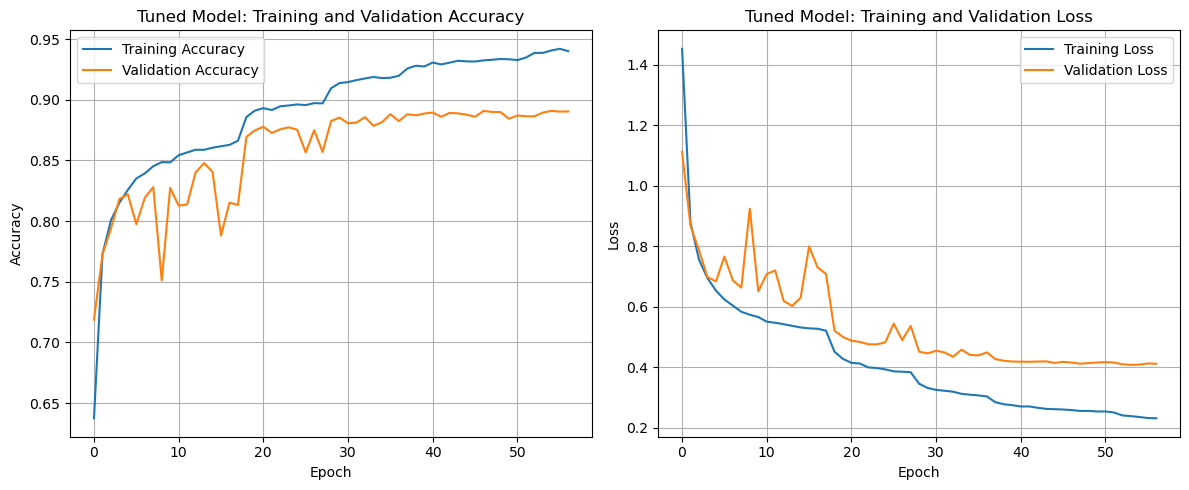

In [23]:
# Plot training and validation accuracy/loss for the tuned model
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Tuned Model: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Tuned Model: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [24]:
# Evaluate the tuned model on the test dataset
loss, accuracy = model.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8903 - loss: 0.4162
Test Loss: 0.3938
Test Accuracy: 0.8943
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8903 - loss: 0.4162
Test Loss: 0.3938
Test Accuracy: 0.8943


### Detailed Performance Metrics

Calculate precision, recall, F1-score, and confusion matrix for comprehensive model evaluation.

### Compare Baseline vs All Tuned Models

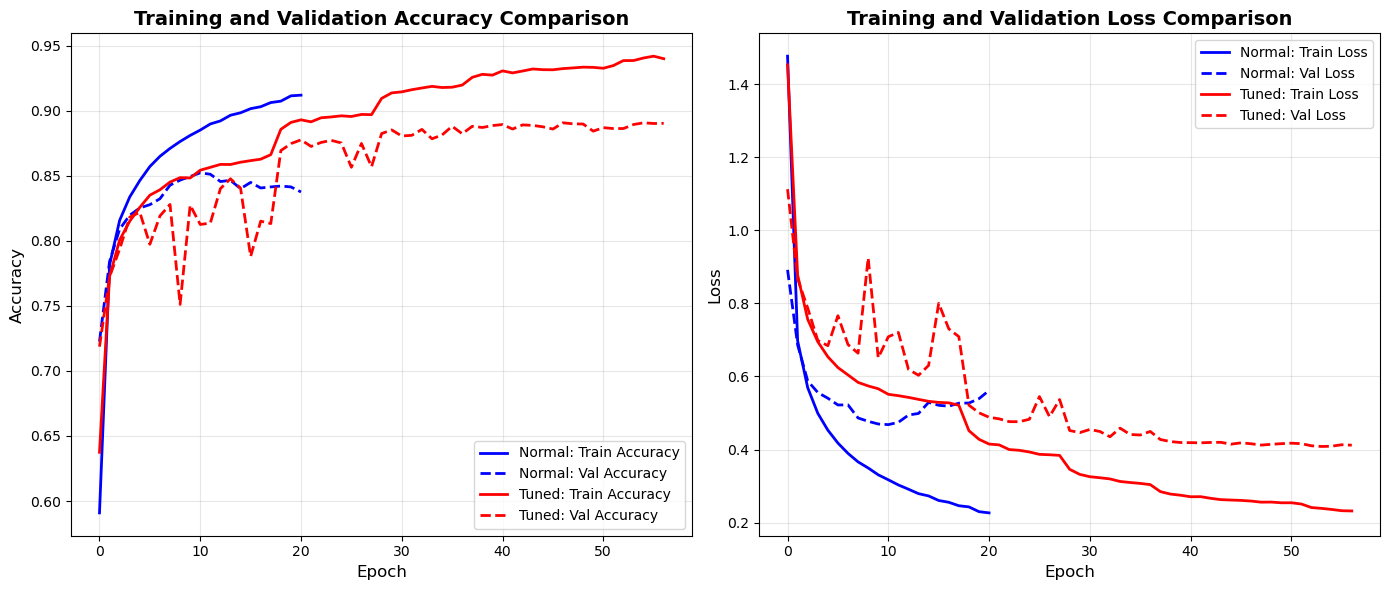


FINAL METRICS COMPARISON
Normal Model:
  Final Train Accuracy: 0.9120
  Final Val Accuracy:   0.8376
  Final Train Loss:     0.2268
  Final Val Loss:       0.5618

Tuned Model:
  Final Train Accuracy: 0.9400
  Final Val Accuracy:   0.8903
  Final Train Loss:     0.2321
  Final Val Loss:       0.4121


In [25]:
# Compare normal model vs tuned model visually and print final metrics
# Save tuned history for comparison
# Plot accuracy and loss for both models

tuned_history = history

plt.figure(figsize=(14, 6))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(normal_history.history['accuracy'], 'b-', label='Normal: Train Accuracy', linewidth=2)
plt.plot(normal_history.history['val_accuracy'], 'b--', label='Normal: Val Accuracy', linewidth=2)
plt.plot(tuned_history.history['accuracy'], 'r-', label='Tuned: Train Accuracy', linewidth=2)
plt.plot(tuned_history.history['val_accuracy'], 'r--', label='Tuned: Val Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(normal_history.history['loss'], 'b-', label='Normal: Train Loss', linewidth=2)
plt.plot(normal_history.history['val_loss'], 'b--', label='Normal: Val Loss', linewidth=2)
plt.plot(tuned_history.history['loss'], 'r-', label='Tuned: Train Loss', linewidth=2)
plt.plot(tuned_history.history['val_loss'], 'r--', label='Tuned: Val Loss', linewidth=2)
plt.title('Training and Validation Loss Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics for both models
print("\n" + "="*60)
print("FINAL METRICS COMPARISON")
print("="*60)
print(f"Normal Model:")
print(f"  Final Train Accuracy: {normal_history.history['accuracy'][-1]:.4f}")
print(f"  Final Val Accuracy:   {normal_history.history['val_accuracy'][-1]:.4f}")
print(f"  Final Train Loss:     {normal_history.history['loss'][-1]:.4f}")
print(f"  Final Val Loss:       {normal_history.history['val_loss'][-1]:.4f}")
print(f"\nTuned Model:")
print(f"  Final Train Accuracy: {tuned_history.history['accuracy'][-1]:.4f}")
print(f"  Final Val Accuracy:   {tuned_history.history['val_accuracy'][-1]:.4f}")
print(f"  Final Train Loss:     {tuned_history.history['loss'][-1]:.4f}")
print(f"  Final Val Loss:       {tuned_history.history['val_loss'][-1]:.4f}")
print("="*60)


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np

# Collect all predictions and true labels from test set
print("Generating predictions for detailed metrics...")
all_predictions = []
all_labels = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    pred_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)
    
    all_predictions.extend(pred_classes)
    all_labels.extend(true_classes)

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Calculate metrics
precision_macro = precision_score(all_labels, all_predictions, average='macro', zero_division=0)
recall_macro = recall_score(all_labels, all_predictions, average='macro', zero_division=0)
f1_macro = f1_score(all_labels, all_predictions, average='macro', zero_division=0)

precision_weighted = precision_score(all_labels, all_predictions, average='weighted', zero_division=0)
recall_weighted = recall_score(all_labels, all_predictions, average='weighted', zero_division=0)
f1_weighted = f1_score(all_labels, all_predictions, average='weighted', zero_division=0)

# Display results
print("\n" + "=" * 80)
print("DETAILED PERFORMANCE METRICS - LENET-5")
print("=" * 80)
print("\nMACRO AVERAGES (Equal weight for each class):")
print(f"  Precision (Macro): {precision_macro:.4f} ({precision_macro*100:.2f}%)")
print(f"  Recall (Macro):    {recall_macro:.4f} ({recall_macro*100:.2f}%)")
print(f"  F1-Score (Macro):  {f1_macro:.4f} ({f1_macro*100:.2f}%)")

print("\nWEIGHTED AVERAGES (Weighted by class frequency):")
print(f"  Precision (Weighted): {precision_weighted:.4f} ({precision_weighted*100:.2f}%)")
print(f"  Recall (Weighted):    {recall_weighted:.4f} ({recall_weighted*100:.2f}%)")
print(f"  F1-Score (Weighted):  {f1_weighted:.4f} ({f1_weighted*100:.2f}%)")

# Get class names from saved list
display_names = []
for class_name in class_names_list:
    if class_name == '999':
        display_names.append('NULL')
    else:
        display_names.append(chr(int(class_name)))

print("\n" + "=" * 80)
print("CLASSIFICATION REPORT (Per-class metrics)")
print("=" * 80)
print(classification_report(all_labels, all_predictions, 
                           target_names=display_names, zero_division=0))

# Save metrics
import pandas as pd
metrics_data = {
    'Metric': ['Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)', 
               'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)'],
    'Score': [precision_macro, recall_macro, f1_macro, 
              precision_weighted, recall_weighted, f1_weighted],
    'Percentage': [f"{precision_macro*100:.2f}%", f"{recall_macro*100:.2f}%", 
                   f"{f1_macro*100:.2f}%", f"{precision_weighted*100:.2f}%", 
                   f"{recall_weighted*100:.2f}%", f"{f1_weighted*100:.2f}%"]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_csv_path = os.path.join(RESULTS_PATH, 'precision_recall_f1_scores.csv')
metrics_df.to_csv(metrics_csv_path, index=False)
print(f"\n✓ Metrics saved to: {metrics_csv_path}")

Generating predictions for detailed metrics...

DETAILED PERFORMANCE METRICS - LENET-5

MACRO AVERAGES (Equal weight for each class):
  Precision (Macro): 0.8695 (86.95%)
  Recall (Macro):    0.8679 (86.79%)
  F1-Score (Macro):  0.8676 (86.76%)

WEIGHTED AVERAGES (Weighted by class frequency):
  Precision (Weighted): 0.8961 (89.61%)
  Recall (Weighted):    0.8943 (89.43%)
  F1-Score (Weighted):  0.8943 (89.43%)

CLASSIFICATION REPORT (Per-class metrics)
              precision    recall  f1-score   support

           d       0.97      0.97      0.97       214
           e       0.94      0.96      0.95       592
           f       0.82      0.85      0.83       121
           g       0.86      0.86      0.86       152
           h       0.93      0.91      0.92       198
           i       0.96      0.92      0.94       407
           j       0.93      0.92      0.92        85
           k       0.73      0.71      0.72       111
           l       0.70      0.92      0.80       283
 

2025-10-22 22:34:31.388042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Visualize Precision, Recall, and F1-Score

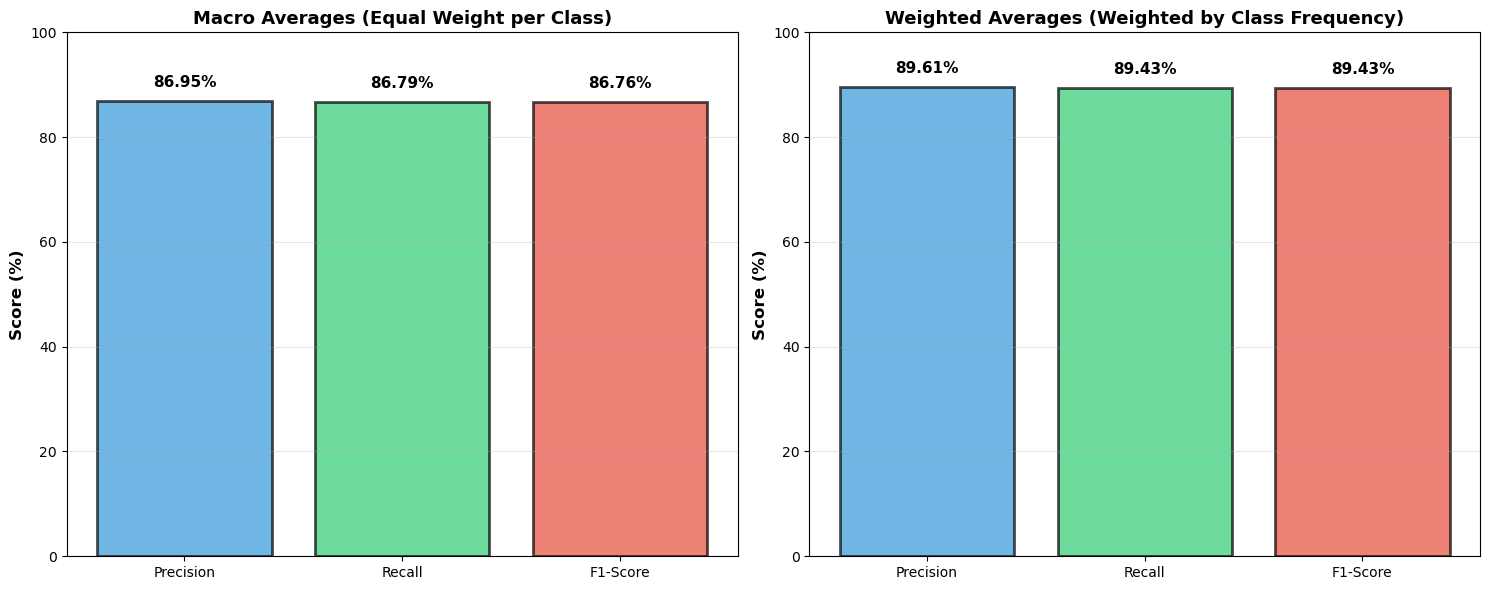

✓ Metrics chart saved to: /home/ubuntu/Desktop/AIML project/results/LeNet-5/precision_recall_f1_scores_chart.png


In [31]:
import matplotlib.pyplot as plt

# Create visualization of metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Macro Averages
metrics_names = ['Precision', 'Recall', 'F1-Score']
scores_macro = [precision_macro * 100, recall_macro * 100, f1_macro * 100]
colors_metrics = ['#3498db', '#2ecc71', '#e74c3c']

ax1 = axes[0]
bars1 = ax1.bar(metrics_names, scores_macro, color=colors_metrics, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax1.set_title('Macro Averages (Equal Weight per Class)', fontsize=13, fontweight='bold')
ax1.set_ylim([0, 100])
ax1.grid(axis='y', alpha=0.3)

for bar, score in zip(bars1, scores_macro):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{score:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Plot 2: Weighted Averages
scores_weighted = [precision_weighted * 100, recall_weighted * 100, f1_weighted * 100]
ax2 = axes[1]
bars2 = ax2.bar(metrics_names, scores_weighted, color=colors_metrics, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax2.set_title('Weighted Averages (Weighted by Class Frequency)', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 100])
ax2.grid(axis='y', alpha=0.3)

for bar, score in zip(bars2, scores_weighted):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{score:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
metrics_chart_path = os.path.join(RESULTS_PATH, 'precision_recall_f1_scores_chart.png')
plt.savefig(metrics_chart_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Metrics chart saved to: {metrics_chart_path}")

### Confusion Matrix

Visualize the confusion matrix to identify which characters are most commonly confused.

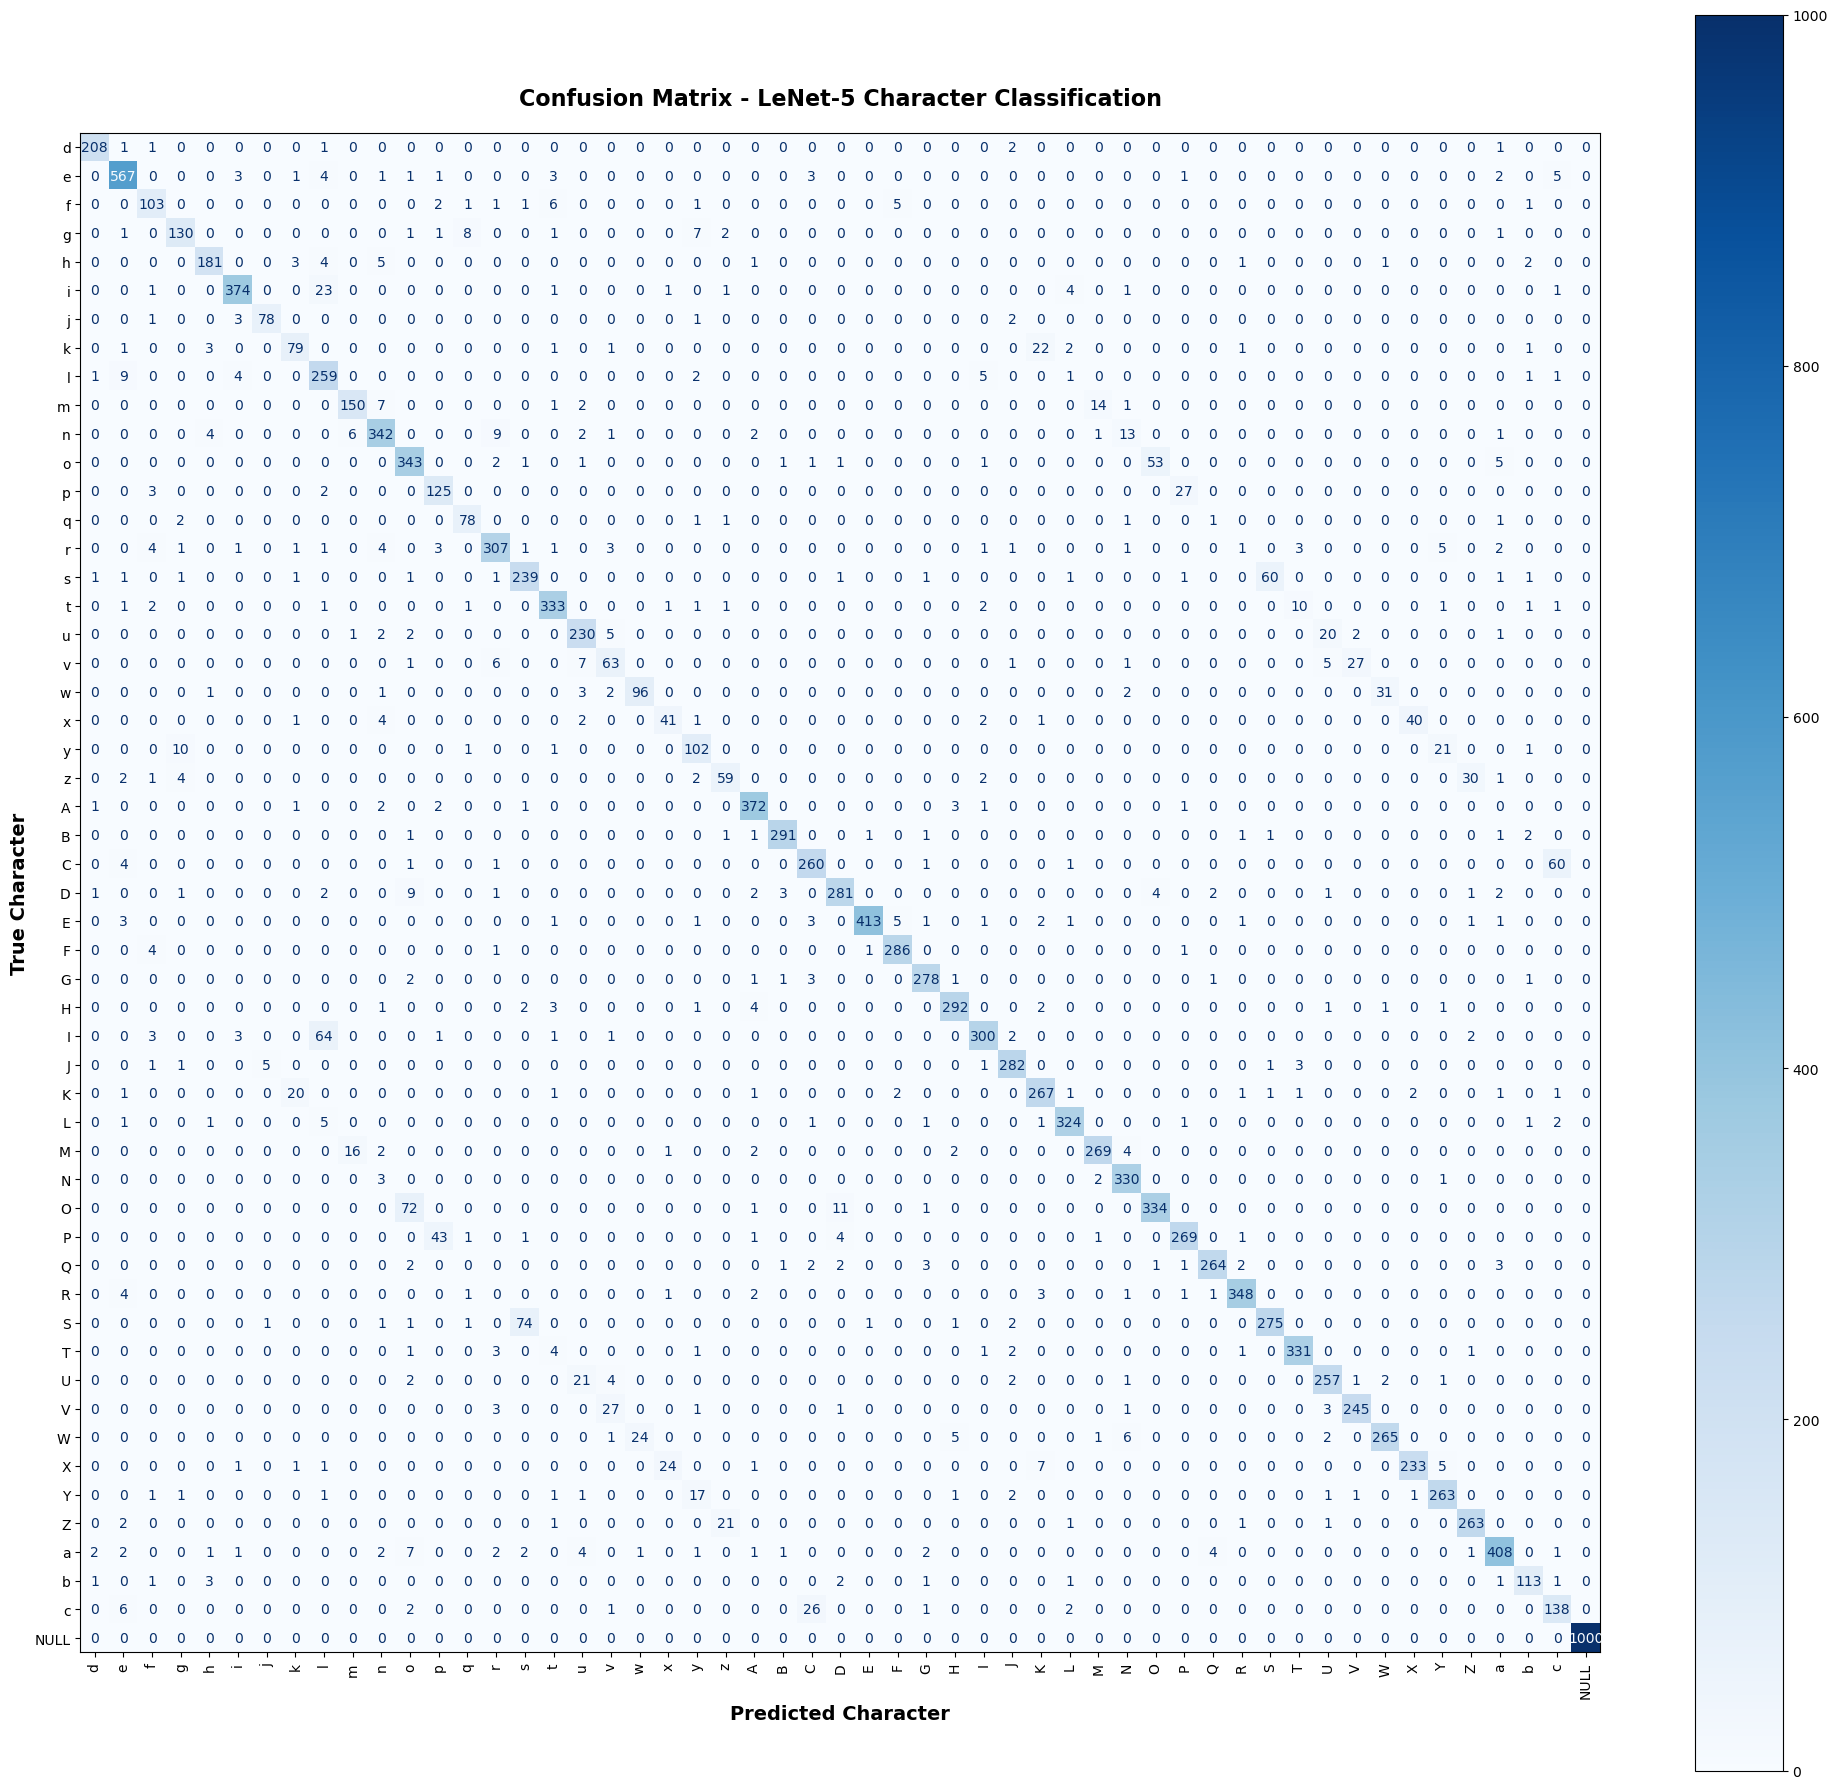

✓ Confusion matrix saved to: /home/ubuntu/Desktop/AIML project/results/LeNet-5/confusion_matrix.png

MOST CONFUSED CHARACTER PAIRS

True     Predicted  Count   
------------------------------
S        s          74      
O        o          72      
I        l          64      
s        S          60      
C        c          60      
o        O          53      
P        p          43      
x        X          40      
w        W          31      
z        Z          30      


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Create figure for confusion matrix
fig, ax = plt.subplots(figsize=(20, 18))

# Display confusion matrix with character labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_names)
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical', values_format='d')

ax.set_title('Confusion Matrix - LeNet-5 Character Classification', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Predicted Character', fontsize=14, fontweight='bold')
ax.set_ylabel('True Character', fontsize=14, fontweight='bold')

plt.tight_layout()

# Save confusion matrix
cm_path = os.path.join(RESULTS_PATH, 'confusion_matrix.png')
plt.savefig(cm_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Confusion matrix saved to: {cm_path}")

# Analyze most confused pairs
print("\n" + "=" * 80)
print("MOST CONFUSED CHARACTER PAIRS")
print("=" * 80)

# Find top 10 misclassifications (excluding diagonal)
misclassifications = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i][j] > 0:
            misclassifications.append((display_names[i], display_names[j], cm[i][j]))

# Sort by count and get top 10
misclassifications.sort(key=lambda x: x[2], reverse=True)
top_10 = misclassifications[:10] if len(misclassifications) >= 10 else misclassifications

if top_10:
    print(f"\n{'True':<8} {'Predicted':<10} {'Count':<8}")
    print("-" * 30)
    for true_char, pred_char, count in top_10:
        print(f"{true_char:<8} {pred_char:<10} {count:<8}")
else:
    print("\n✓ No misclassifications found! Perfect accuracy!")

print("=" * 80)